In [1]:
!pip install qiskit[visualization]
!pip install qiskit-aer
from qiskit import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=d890cb20efff7d8a8890e48c1fe61ebb19643e0467cec8a22aad4c0b4033a25e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc55

#Entanglement Lab

Single qubits are interesting, but individually they offer no computational advantage. We will now look at how we represent multiple qubits, and how these qubits can interact with each other. We have seen how we can represent the state of a qubit using a 2D-vector, now we will see how we can represent the state of multiple qubits.


###Representing Multi-Qubit States
We saw that a single bit has two possible states, and a qubit state has two complex amplitudes. Similarly, two bits have four possible states:
00 01 10 11

And to describe the state of two qubits requires four complex amplitudes. We store these amplitudes in a 4D-vector like so:


$|a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle =
\begin{bmatrix}
a_{00} \\
a_{01} \\
a_{10} \\
a_{11} \\
\end{bmatrix}$

The rules of measurement still work in the same way:

$p(|00\rangle) = |\langle00|a\rangle|^2 = |a_{00}|^2$

And the same implications hold, such as the normalisation condition:

$|a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1$




In [4]:
#Ex 1: generate a circuit which creates the statevector 1/sqrt8 [1 1 1 1 -1 -1 -1 -1]

qc = QuantumCircuit(3)
qc.z(0)
qc.z(1)
qc.z(2)


sim_state = Aer.get_backend('statevector_simulator')
from qiskit.visualization import array_to_latex
array_to_latex(sim_state.run(qc).result().get_statevector())

<IPython.core.display.Latex object>

##Single Qubit Gates on Multi-Qubit Statevectors
We can represent simultaneous operations - H & X - using their kronecker product

$X|q_1\rangle ⊗ H|q_0\rangle = (X⊗ H)|q_1q_0\rangle$

$(X⊗ H) = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
⊗ \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
0\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix} & 1\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix} \\
1\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix} & 0\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\end{bmatrix}$

$=\frac{1}{\sqrt{2}}
\begin{bmatrix}
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1 \\
1 & 1 & 0 & 0 \\
1 & -1 & 0 & 0
\end{bmatrix}$


In [5]:
#Check our results
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
sim_unit = Aer.get_backend('unitary_simulator')
array_to_latex(sim_unit.run(qc).result().get_unitary())

<IPython.core.display.Latex object>

##Multi-Qubit Gates
###CNOT Gate

The CNOT, as we have seen before, performs an X gate on the target qubit if the control qubit is a $|1\rangle$

Considering our first qubit as the control,

CNOT =
$\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{bmatrix}$


$CNOT|a\rangle =
\begin{bmatrix}
a_{00} \\
a_{01} \\
a_{11} \\
a_{10}
\end{bmatrix}$

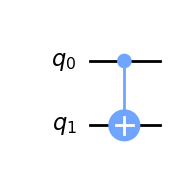

In [6]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl')



---


We now have the tools to entangle our qubits!

We have 4 types of entangled qubit pairs:

$|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$

$|\Phi^-\rangle = \frac{|00\rangle - |11\rangle}{\sqrt{2}}$

$|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}$

$|\Psi^-\rangle = \frac{|01\rangle - |10\rangle}{\sqrt{2}}$

In [7]:
#Making phi +

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

array_to_latex(sim_state.run(qc).result().get_statevector())

<IPython.core.display.Latex object>

In [8]:
#Ex1.1: Making phi -

qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)

array_to_latex(sim_state.run(qc).result().get_statevector())

<IPython.core.display.Latex object>

In [9]:
#Making psi +

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)

array_to_latex(sim_state.run(qc).result().get_statevector())

<IPython.core.display.Latex object>

In [21]:
#Ex1.2: Making psi -
qc = QuantumCircuit(2)

qc.h(0)
qc.z(0)

qc.x(1)
qc.z(1)

qc.cx(0,1)

array_to_latex(sim_state.run(qc).result().get_statevector())

<IPython.core.display.Latex object>



---

#Superdense Coding!


Let's get to superdense coding.
Superdense coding is a quantum communication protocol that lets a sender send two classical bits of information using just one qubit!

###The protocol:
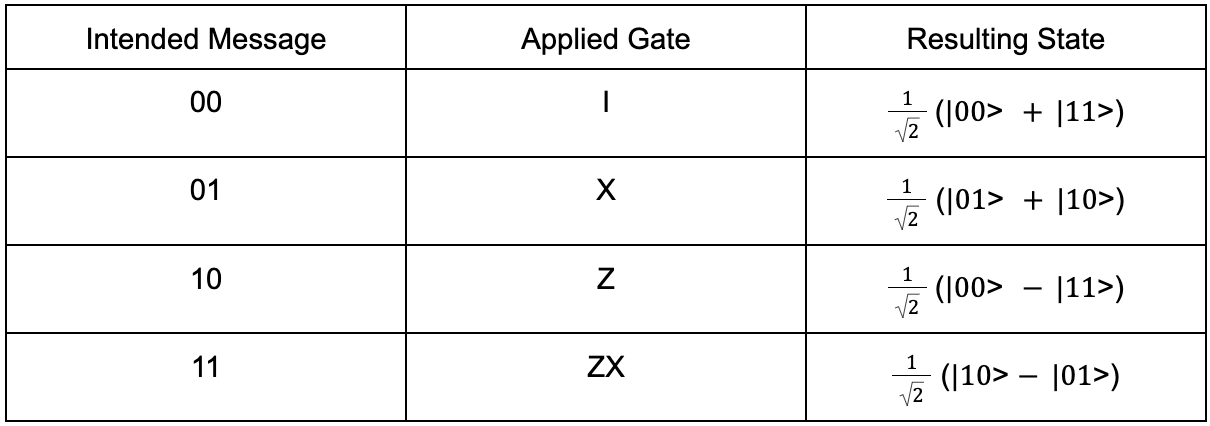

Alice and Bob share entangled qubits $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$!

Before Bob does anything with his, Alice first applies gates according to her intended message to Bob.
Once Alice is done, Bob simply pass his qubits through a reverse Bell circuit in order to decode Alice’s message. Thus, Bob will obtain two classical bits of information from a single qubit!

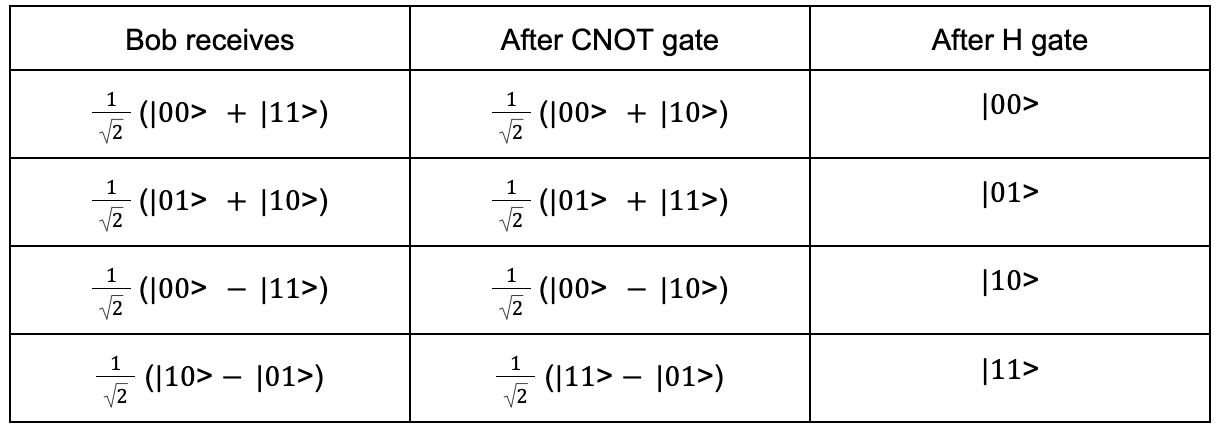

Let's try doing this on code:

In [41]:
#Ex 2.1: create a quantum circuit with 2 qubits and 2 cbits
qc = QuantumCircuit(2,2)

#Ex 2.2: create the entangled qubits
qc.h(0)
qc.cx(0,1)

qc.barrier()


In [42]:
#Ex 2.3: encode message
msg = '11'
qc.z(0)
qc.x(0)
if msg == '00':
  pass
elif msg == '01':
  qc.z(0)
elif msg =='10':
  qc.x(0)
elif msg == '11':
  qc.barrier()

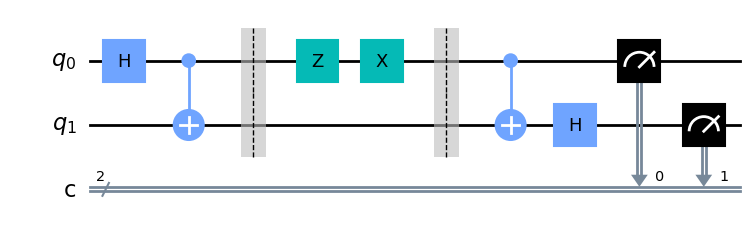

In [43]:
#Ex 2.4: un-entangle the qubits
qc.cx(0,1)
qc.h(1)

qc.measure([0,1],[0,1])

# Draw output
qc.draw('mpl')